In [3]:
import numpy as np
import scipy 
import scipy.linalg as la
import matplotlib.pyplot as plt
import control as ctrl
import sympy as sp

In [4]:
def lqr(A, B, Q, R):
    """
    Parameters:
        A (numpy.ndarray): State matrix.
        B (numpy.ndarray): Input matrix.
        Q (numpy.ndarray): State cost matrix.
        R (numpy.ndarray): Input cost matrix.

    Returns:
        K (numpy.ndarray): Feedback gain matrix.
    """
    P = la.solve_continuous_are(A, B, Q, R)

    # Calculate the feedback gain matrix
    K = np.linalg.inv(R) @ B.T @ P
    return K

In [5]:
def impulso(temp,v,dur):
    m1 = np.zeros(temp//4)
    m3 = np.zeros(dur)
    m3 = m3 + v
    m2 = np.zeros(temp- len(m1) - len(m3))
    return np.block([m1,m3,m2])

In [6]:
A = np.array([[  0.        ,   0.        ,   0.        ,   1.        ,  0.        ,   0.        ],
      [  0.        ,   0.        ,   0.        ,   0.        , 1.        ,   0.        ],
      [  0.        ,   0.        ,   0.        ,   0.        , 0.        ,   1.        ],
      [  0.        ,  -7.3575    ,   0.78830357,   0.        , 0.29285714,  -0.14285714],
      [  0.        ,  73.575     , -33.10875   ,   0.        ,  -3.66      ,   2.16      ],
      [  0.        , -58.86      ,  51.15214286,   0.        , 3.6431746 ,  -2.4431746 ]])

Bcont = np.array([[  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.60714286,   1.78571429],
       [ -1.5       , -27.        ],
       [  0.28571429,  30.53968254]])

B= np.array([[  0.        ,   0.  , 0      ],
       [  0.        ,   0.        , 0      ],
       [  0.        ,   0.        , 0      ],
       [  0.60714286,   1.78571429, 0.286  ],
       [ -1.5       , -27.        , -12.   ],
       [  0.28571429,  30.53968254, 18.54  ]])


C = np.array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

D = np.array([[0., 0.],
       [0., 0.],
       [0., 0.]])

E = np.array([[  0.  ],
       [  0.   ],
       [  0.  ],
       [  0.286],
       [-12.  ],
       [ 18.54]])

In [7]:
#Pegando o K do meu sistema com LQR

Q = np.diag([10000, 1, 1000, 1, 1, 1])          # don't turn too sharply
R = np.diag([10, 100])  

Klqr = lqr(A, Bcont, Q, R)

print(Klqr)

[[-21.67439573 -84.19267241 -57.02282228 -22.64757982 -20.59243861
  -16.50427155]
 [ -7.28162461 -15.14148254  -2.88131464  -5.09450896  -3.1939791
   -1.91107603]]


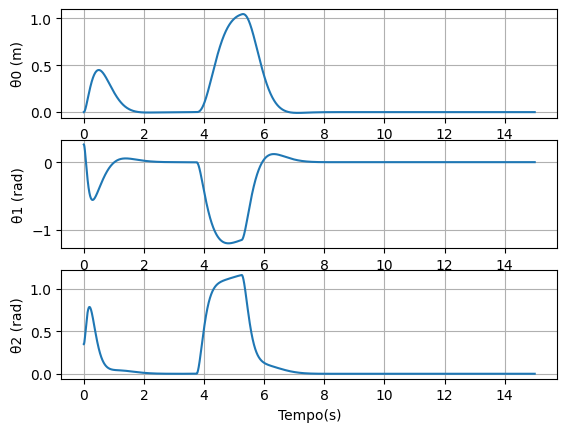

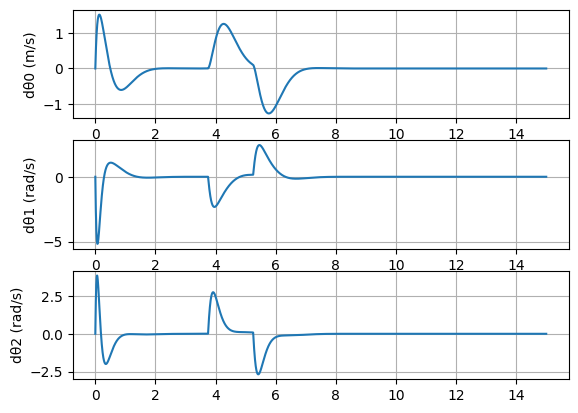

In [8]:
Acl = A - np.dot(Bcont, Klqr)

syscl = ctrl.ss(Acl,E, C, 0)

tempo = np.linspace(0, 15, 400000)

vento = 2

X0 = [0, np.pi*15/180, np.pi*20/180, 0, 0,0]

t, amp,ycl = ctrl.forced_response(syscl, tempo, impulso(len(tempo),vento,len(tempo)//10) ,X0 ,return_x = 'True')

f,(ax1, ax2, ax3) = plt.subplots(3, 1)
f,(ax4,ax5,ax6) = plt.subplots(3,1)
# plt.subplots_adjust( wspace=0.5,hspace=0.5)

ax1.set_xlabel('Tempo(s)')
ax2.set_xlabel('Tempo(s)')
ax3.set_xlabel('Tempo(s)')
ax4.set_xlabel('Tempo(s)')
ax5.set_xlabel('Tempo(s)')

ax1.plot(t, ycl[0])
ax1.set_ylabel('θ0 (m)')
ax1.grid(True)

ax2.plot(t, ycl[1])
ax2.set_ylabel('θ1 (rad)')
ax2.grid(True)

ax3.plot(t, ycl[2])
ax3.set_ylabel('θ2 (rad)')
ax3.grid(True)

ax4.plot(t, ycl[3])
ax4.set_ylabel('dθ0 (m/s)')
ax4.grid(True)

ax5.plot(t, ycl[4])
ax5.set_ylabel('dθ1 (rad/s)')
ax5.grid(True)

ax6.plot(t, ycl[5])
ax6.set_ylabel('dθ2 (rad/s)')
ax6.grid(True)

plt.show(block=False)

In [9]:
polos = ctrl.poles(syscl)
polos

array([ -3.04095175+2.15477484j,  -3.04095175-2.15477484j,
        -3.89838285+0.91240792j,  -3.89838285-0.91240792j,
       -11.71189183+2.32369858j, -11.71189183-2.32369858j])

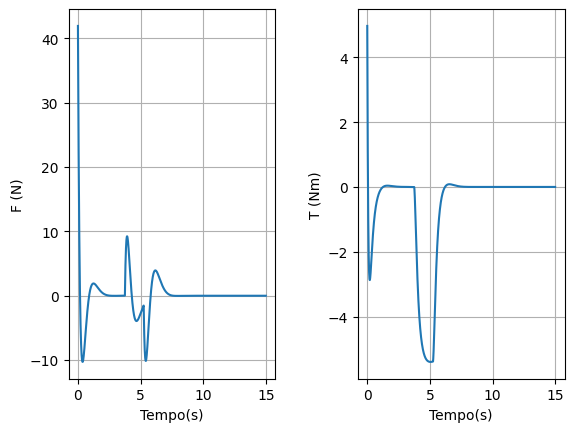

In [10]:
uobs = np.dot(-Klqr,[ycl[0],ycl[1],ycl[2],ycl[3],ycl[4],ycl[5]])
f,(ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4,hspace=0.5)
ax1.plot(t, uobs[0])
ax1.set_ylabel('F (N)')
ax1.set_xlabel('Tempo(s)')
ax1.grid(True)

ax2.plot(t, uobs[1])
ax2.set_ylabel('T (Nm)')
ax2.set_xlabel('Tempo(s)')
ax2.grid(True)
plt.show(block=False)

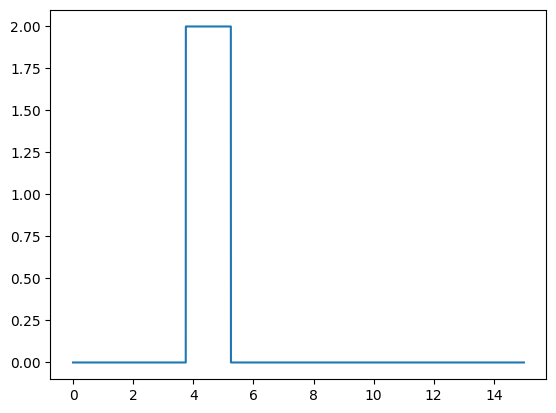

In [11]:
plt.plot(tempo,impulso(len(tempo),vento,len(tempo)//10))

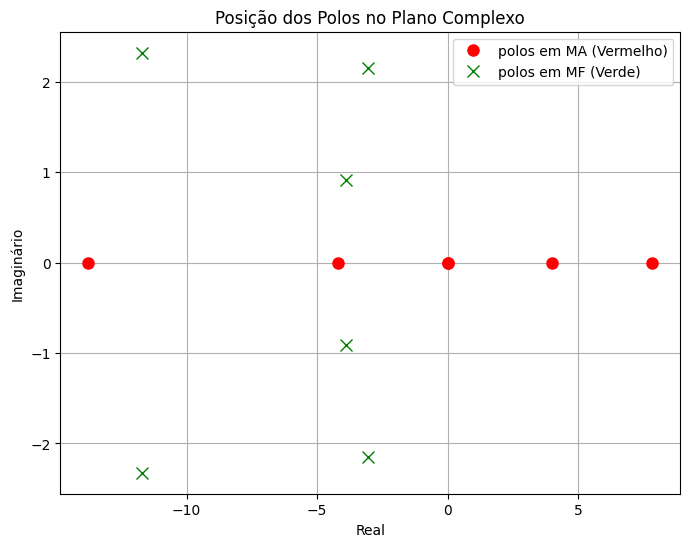

In [ ]:
polesmf = [ -3.04095175+2.15477484j,  -3.04095175-2.15477484j,
        -3.89838285+0.91240792j,  -3.89838285-0.91240792j,
       -11.71189183+2.32369858j, -11.71189183-2.32369858j]
polesma = [ 0. +0.j, 0. +0.j, -13.76247078+0.j,
         -4.19278061+0.j, 7.84132279+0.j, 4.010754 +0.j]

real_parts_ma = [p.real for p in polesma]
imag_parts_ma = [p.imag for p in polesma]
real_parts_mf = [q.real for q in polesmf]
imag_parts_mf = [q.imag for q in polesmf]

plt.figure(figsize=(8, 6))
plt.plot(real_parts_ma, imag_parts_ma, 'ro', markersize=8, label='polos em MA (Vermelho)')
plt.plot(real_parts_mf, imag_parts_mf, 'gx', markersize=8, label='polos em MF (Verde)')
plt.xlabel('Real')
plt.ylabel('Imaginário')
plt.title('Posição dos Polos no Plano Complexo')
plt.grid(True)
plt.legend()
plt.show()